# Example notebook for plotting Qudit States

First, define a quantum state. I will use the time evolution of the angular momentum operator $L_z$ and $L_x$. More on that [here in chapter 2.2 and following](https://www.kip.uni-heidelberg.de/Veroeffentlichungen/download/6701/pdf-6701.pdf).

In [1]:
import numpy as np
from quditvis import plot_qudit_wigner
import scipy
from scipy.sparse.linalg import expm
from scipy.sparse import coo_matrix, csc_matrix, diags, identity

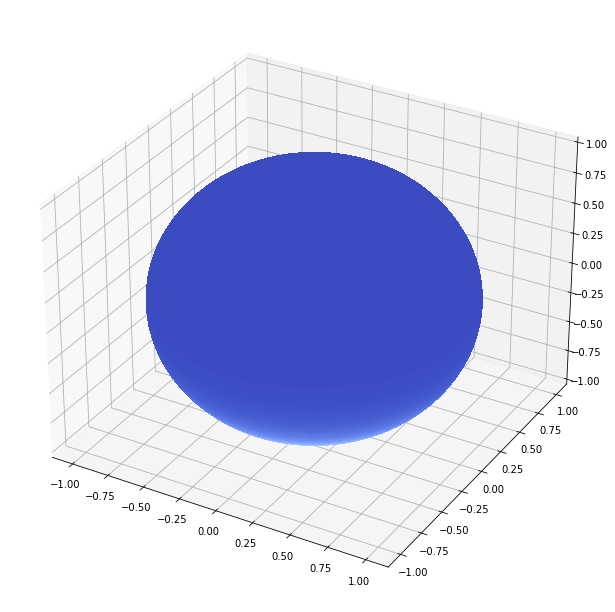

In [2]:
initial_state = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])

_ = plot_qudit_wigner(initial_state)

Nothing much to see here. Lets rotate the state around the x-axis for exactly $\frac{\pi}{2}$. For that we need to define the spin matrices.

In [3]:
l = 4 # spin length

# let's put together spin matrices
dim_qudit = 2*l+1
qudit_range = np.arange(l, -(l+1),-1)


Id  =  scipy.sparse.csc_matrix(identity(dim_qudit))
Lx  =  scipy.sparse.csc_matrix(1/2*diags([np.sqrt([(l-m+1)*(l+m) for m in qudit_range[:-1]]), np.sqrt([(l+m+1)*(l-m) for m in qudit_range[1:]]) ], [-1, 1]))
Lz  =  scipy.sparse.csc_matrix(diags([qudit_range], [0]))
Lz2 = Lz.multiply(Lz)

Lx = Lx.toarray()
Lz = Lz.toarray()
Lz2 = Lz2.toarray()

And define the time evolution functions. For simplicity sake we will call the Rx, Rz and Rzz

In [4]:
def Rx(psi, theta):
    Ux = scipy.linalg.expm(-1j*theta*Lx)
    psi = np.dot(Ux,psi)
    return psi

def Rz(psi, theta):
    Uz = scipy.linalg.expm(-1j*theta*Lz)
    psi = np.dot(Uz,psi)
    return psi

def Rzz(psi, theta, conj=False):
    Uz2 = scipy.linalg.expm(-1j*theta*Lz2)
    psi = np.dot(Uz2,psi)
    return psi


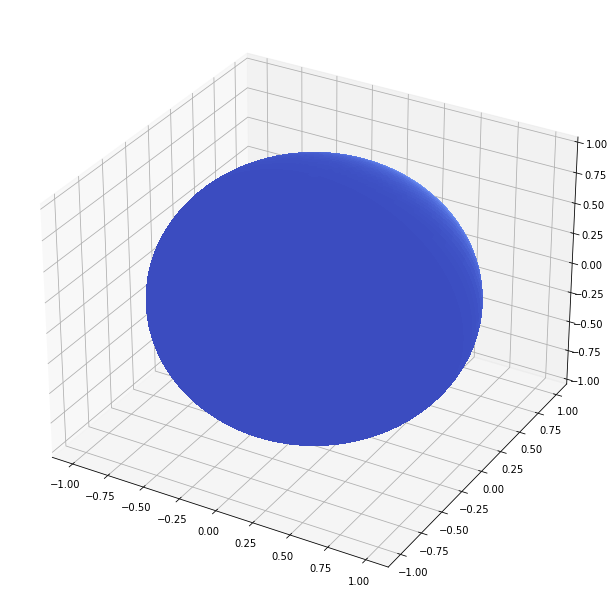

In [5]:
x_rot = Rx(initial_state, np.pi/2)

_ = plot_qudit_wigner(x_rot)

Well, this is unfortunate. Lets rotate the view using the `elev` keyword argument.

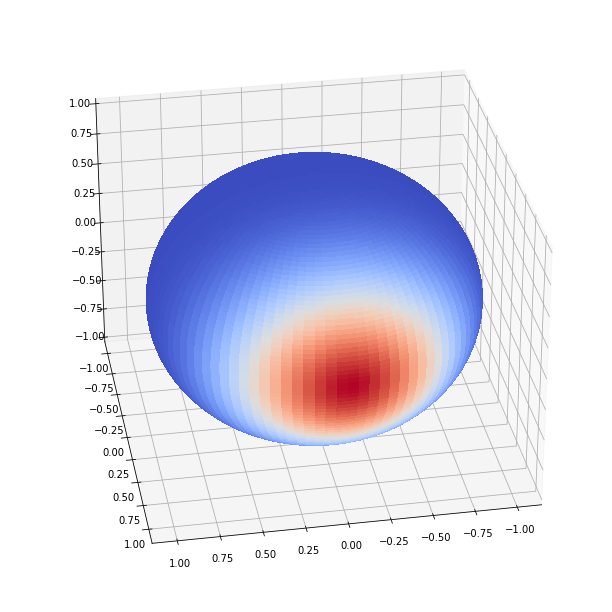

In [6]:
_ = plot_qudit_wigner(x_rot, elev=80)

Looks way better. Lets try out the squeezing. More on that in [here in chapter 2.3.2 and following](https://www.kip.uni-heidelberg.de/Veroeffentlichungen/download/6701/pdf-6701.pdf). If you want to dive deeper, look into [chapter 2.1.7 here](https://archiv.ub.uni-heidelberg.de/volltextserver/20251/1/HelmutStrobel_PHD.pdf)

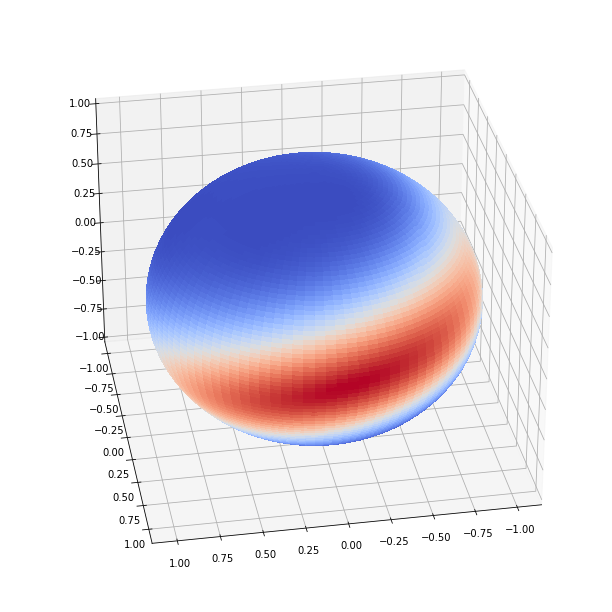

In [9]:
squeezing = Rzz(x_rot, 0.4)

_ = plot_qudit_wigner(squeezing, elev=80)

Beautiful! Have fun playing around with the code. :D